## Building Image Occlusion Strategy

In [2]:
# Necessary imports
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

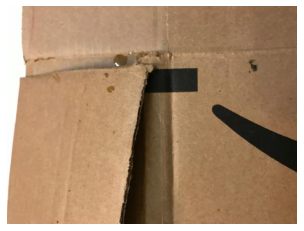

In [8]:
# Opening random image form resized dataset..
image = Image.open('dataset-resized/cardboard/cardboard19.jpg')
plt.axis("off")
plt.imshow(image)
plt.show()

In [14]:
def occlude_image(image):
	# occludes the image with white 
	cv2.rectangle(image, (100,100), (250,250), (250,250,250), -1)

In [15]:
# Resizing
image_resized = image.resize((300, 300))
image_occluded = np.array(image_resized).copy()

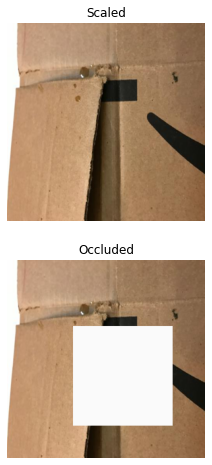

In [17]:
occlude_image(image_occluded)

fig, axs = plt.subplots(2, figsize=(16, 8))
axs[0].imshow(image_resized)
axs[0].title.set_text("Scaled")
axs[0].axis("off")

axs[1].imshow(image_occluded)
axs[1].title.set_text("Occluded")
axs[1].axis("off")
plt.show()

In [ ]:
poison_rates = [5, 10, 15, 20, 25, 30]

In [ ]:
for poison_rate in poison_rates:
    print(f"Poisoning {poison_rate}% of data")
    data = np.load('trashNet.npz')
    x_train, x_test, y_train, y_test = data['x_train'], data['x_test'], data['y_train'],  data['y_test']
    percents = poison_rate/100
    poisoned_count = int(x_train.shape[0]*percents)
    random_index = np.random.choice(x_train.shape[0], poisoned_count, replace=False)
    for index in tqdm(random_index):
        occlude_image(x_train[index])
    print(f"Done Poisoning {poison_rate}% images")
    np.savez_compressed(f'trashNet-poisoned_{poison_rate}', x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)